In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### import data set and explore

In [2]:
studentsDF = pd.read_csv("/Users/joeyposillico/Desktop/Fall DTSC 2024/project 1/StudentPerformanceFactors.csv")
studentsDF.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
studentsDF.shape #checking to see the size

(6607, 20)

In [66]:
studentsDF.columns #getting our column names to keep note of

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Score_Group'],
      dtype='object')

In [67]:
#check if any null values are in the data set
studentsDF.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
Score_Group                    1
dtype: int64

- such low amounts of missing values considering there are 6607 entires, therefore I will just drop the null values 

In [69]:
#drop null values
studentsDF = studentsDF.dropna()
#recheck if any null
studentsDF.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
Score_Group                   0
dtype: int64

- null values have successfully been removed.

In [70]:
#list exam score summary statistics to get a better idea since this is what we are paying alot of focus on
studentsDF['Exam_Score'].describe()

count    6377.000000
mean       67.246825
std         3.891637
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       100.000000
Name: Exam_Score, dtype: float64

In [24]:
#checking the info on the data
studentsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### To better visualize things I've broken the exam scores into categories for better clarity
- these are put into their own DF's

In [72]:
#new df, contains those that have Exam_score of 90 or higher
above90 = studentsDF[studentsDF['Exam_Score'] > 90]
#new df, contains those that have Exam_score of 80 to 89
between80and89 = studentsDF[(studentsDF['Exam_Score'] >= 80) & (studentsDF['Exam_Score'] <= 89)]
#new df, contains those that have Exam_score of 70 to 79
between70and79 = studentsDF[(studentsDF['Exam_Score'] >= 70) & (studentsDF['Exam_Score'] <= 79)]
#new df, contains those that have Exam_score of 69 and below
below69 = studentsDF[studentsDF['Exam_Score'] <= 69]


In [71]:
print('above 90: ',above90.shape)
print('between 80 and 89: ',between80and89.shape)
print('between 70 and 79: ',between70and79.shape)
print('below 69: ',below69.shape)

above 90:  (22, 20)
between 80 and 89:  (26, 20)
between 70 and 79:  (1577, 20)
below 69:  (4982, 20)


#### Important takeaway here is that there is not many above 90 and between 80 and 89 so results may be a bit skewed

In [27]:
above90.head() #checking to make sure it formated correctly

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
770,24,96,Low,High,No,6,93,Medium,Yes,2,Low,Medium,Public,Neutral,2,No,High School,Moderate,Female,94
836,29,76,Medium,Medium,No,8,96,Low,Yes,2,Low,Medium,Public,Positive,2,No,Postgraduate,Moderate,Male,94
919,21,74,High,Medium,No,6,94,Medium,Yes,1,Low,High,Public,Positive,1,No,High School,Near,Male,97


## Visualizations 
- alot of these dont actually get used, I was just mostly plotting and visualzing different relationships to figure out which best fit what I was looking for 

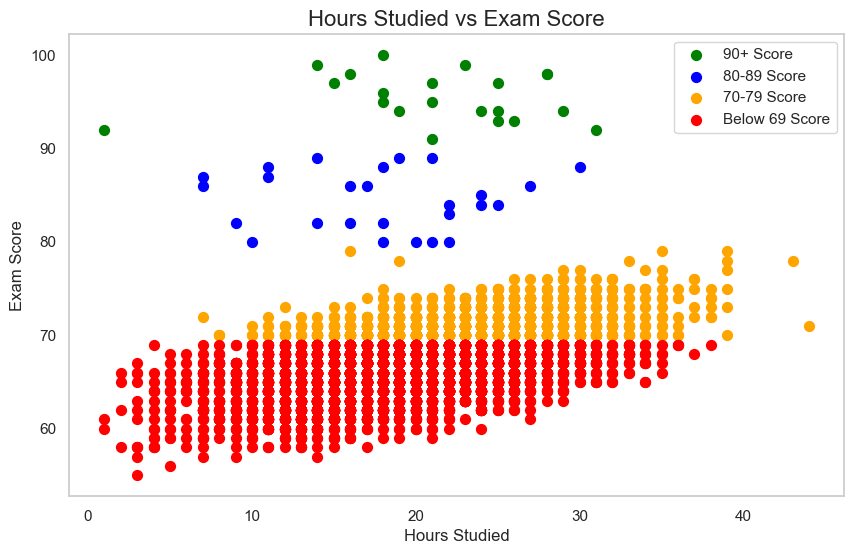

In [73]:
# Plotting a scatter plot for exam scores and hours studied 
plt.figure(figsize=(10, 6))

# Plot for each group
plt.scatter(above90['Hours_Studied'], above90['Exam_Score'], color='green', label='90+ Score', s=50)
plt.scatter(between80and89['Hours_Studied'], between80and89['Exam_Score'], color='blue', label='80-89 Score', s=50)
plt.scatter(between70and79['Hours_Studied'], between70and79['Exam_Score'], color='orange', label='70-79 Score', s=50)
plt.scatter(below69['Hours_Studied'], below69['Exam_Score'], color='red', label='Below 69 Score', s=50)

# Labels and Title
plt.title('Hours Studied vs Exam Score', fontsize=16)
plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()

#plots it
plt.grid(False)
plt.show()


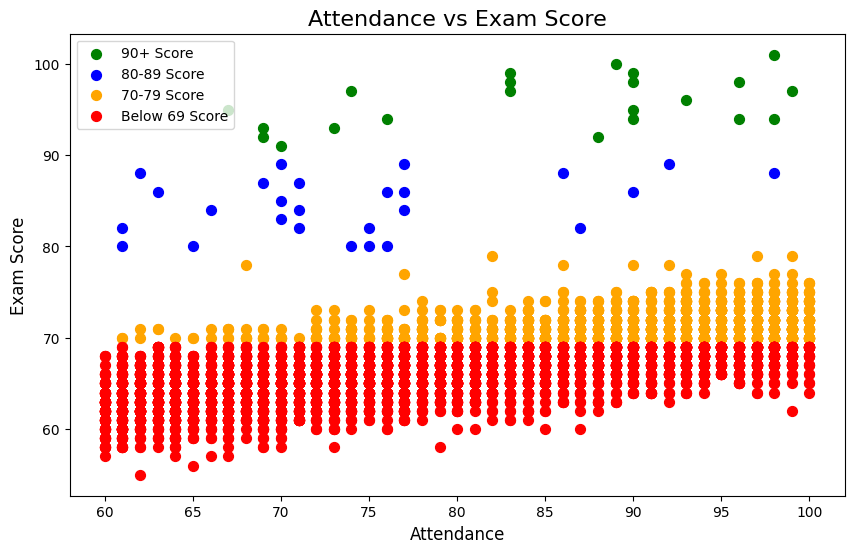

In [29]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot for each group
plt.scatter(above90['Attendance'], above90['Exam_Score'], color='green', label='90+ Score', s=50)
plt.scatter(between80and89['Attendance'], between80and89['Exam_Score'], color='blue', label='80-89 Score', s=50)
plt.scatter(between70and79['Attendance'], between70and79['Exam_Score'], color='orange', label='70-79 Score', s=50)
plt.scatter(below69['Attendance'], below69['Exam_Score'], color='red', label='Below 69 Score', s=50)

# Labels and Title
plt.title('Attendance vs Exam Score', fontsize=16)
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.legend()

# Show the plot
plt.grid(False)
plt.show()

### - not very visually clear and confusing to look at..

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/811651224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Attendance', data=studentsDF, palette='Set3')


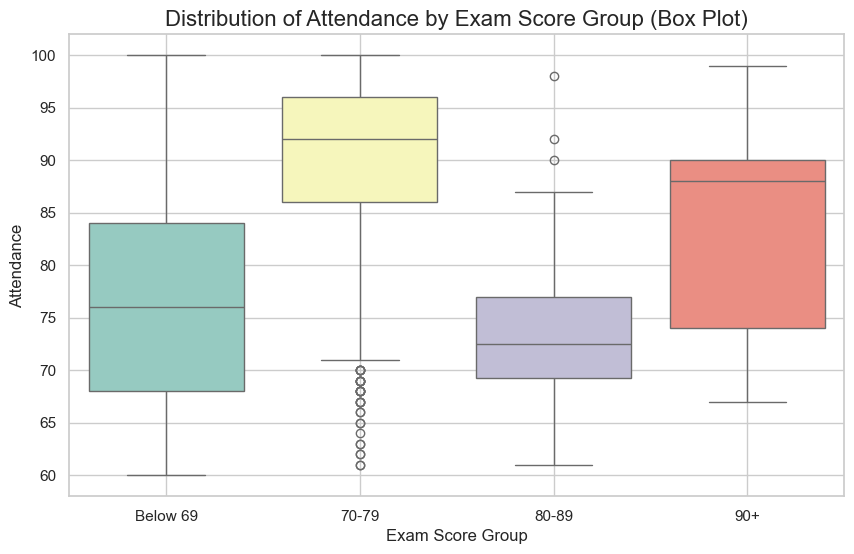

In [74]:
# Combine the dataframes for easier plotting with labels
studentsDF['Score_Group'] = pd.cut(studentsDF['Exam_Score'],
                                   bins=[-1, 69, 79, 89, 100],
                                   labels=['Below 69', '70-79', '80-89', '90+'])

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score_Group', y='Attendance', data=studentsDF, palette='Set3')

# Labels and title
plt.title('Distribution of Attendance by Exam Score Group (Box Plot)', fontsize=16)
plt.xlabel('Exam Score Group', fontsize=12)
plt.ylabel('Attendance', fontsize=12)

# Show plot
plt.grid(True)
plt.show()

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/736208511.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Hours_Studied', data=studentsDF, palette='Set3')


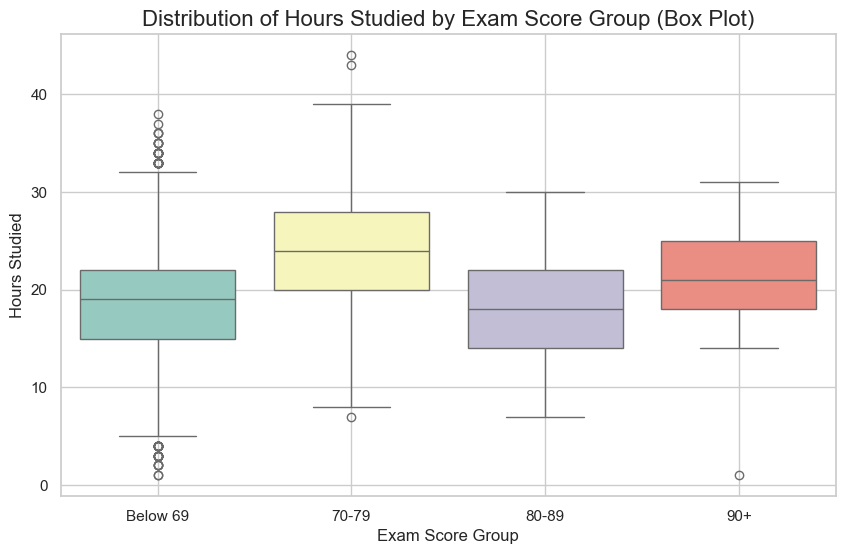

In [77]:
# grouping them together
studentsDF['Score_Group'] = pd.cut(studentsDF['Exam_Score'],
                                   bins=[-1, 69, 79, 89, 100],
                                   labels=['Below 69', '70-79', '80-89', '90+'])

# Create the box plot for Hours Studied
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score_Group', y='Hours_Studied', data=studentsDF, palette='Set3')

# Labels and title
plt.title('Distribution of Hours Studied by Exam Score Group (Box Plot)', fontsize=16)
plt.xlabel('Exam Score Group', fontsize=12)
plt.ylabel('Hours Studied', fontsize=12)

# Show plot
plt.grid(True)
plt.show()

- this is more useable boxplot to show hours studied and exam scores. Shows that actually in the 70-79 hours studied is higher than that in the 90+ group which actually goes against what I was assuming would be true

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/2226062400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Hours_Studied', data=studentsDF, palette='Set3', ax=axes[0])
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/2226062400.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Attendance', data=studentsDF, palette='Set2', ax=axes[1])


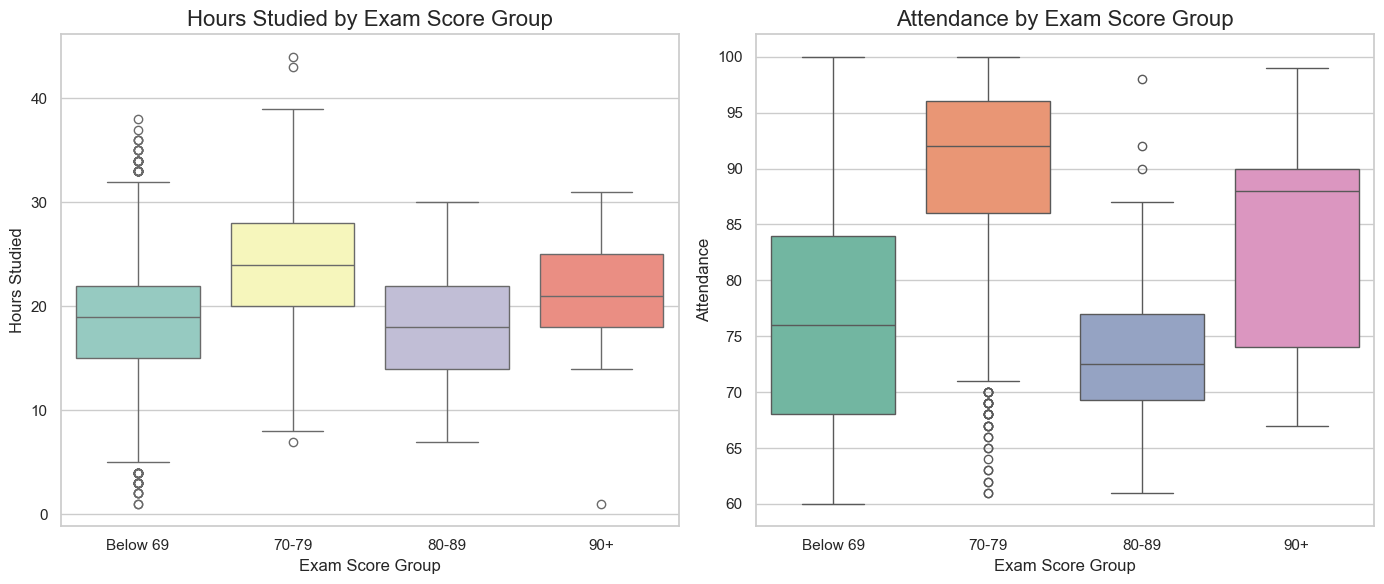

In [78]:
# this allows 2 visuals to be shown in the same plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Hours Studied
sns.boxplot(x='Score_Group', y='Hours_Studied', data=studentsDF, palette='Set3', ax=axes[0])
axes[0].set_title('Hours Studied by Exam Score Group', fontsize=16)
axes[0].set_xlabel('Exam Score Group', fontsize=12)
axes[0].set_ylabel('Hours Studied', fontsize=12)

# Box plot for Attendance
sns.boxplot(x='Score_Group', y='Attendance', data=studentsDF, palette='Set2', ax=axes[1])
axes[1].set_title('Attendance by Exam Score Group', fontsize=16)
axes[1].set_xlabel('Exam Score Group', fontsize=12)
axes[1].set_ylabel('Attendance', fontsize=12)


plt.tight_layout()
plt.show()

- basically repeated the previous graph except this time did the same for attendance which revealed similar results. This can be used to show that these two factors are possibly not as influential as one may had previously believed

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/1056293591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Sleep_Hours', data=studentsDF, palette='Set3', ax=axes[0])
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/1056293591.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Physical_Activity', data=studentsDF, palette='Set2', ax=axes[1])


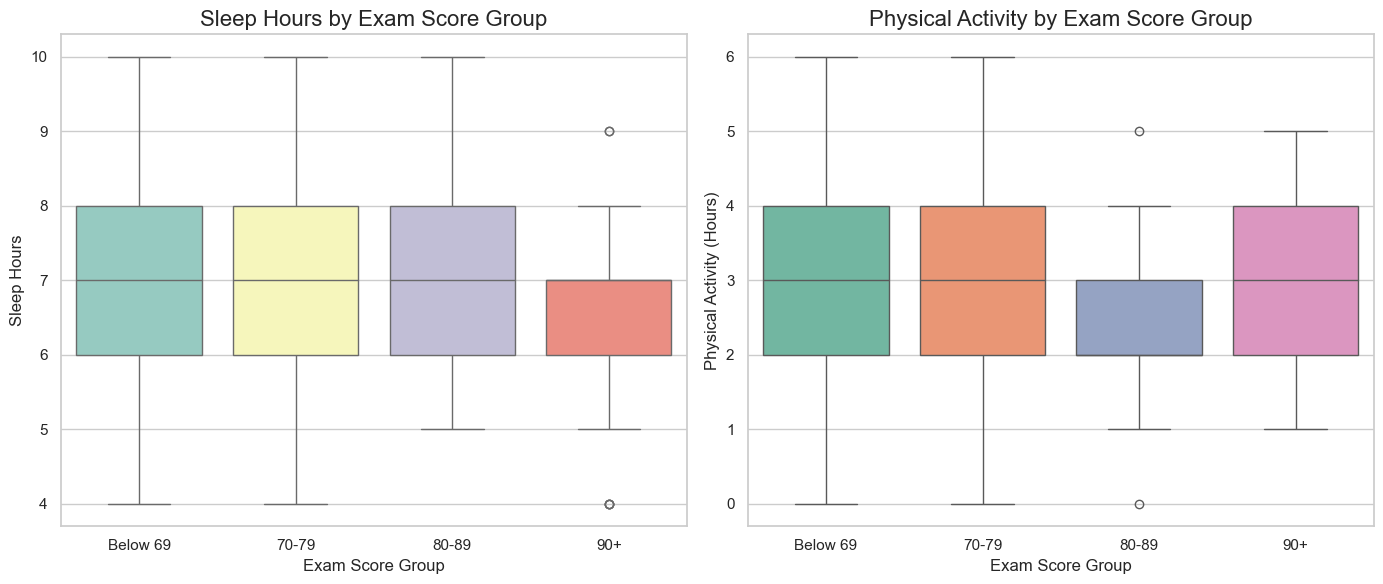

In [75]:


# Create subplots for Sleep Hours and Physical Activity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for Sleep Hours
sns.boxplot(x='Score_Group', y='Sleep_Hours', data=studentsDF, palette='Set3', ax=axes[0])
axes[0].set_title('Sleep Hours by Exam Score Group', fontsize=16)
axes[0].set_xlabel('Exam Score Group', fontsize=12)
axes[0].set_ylabel('Sleep Hours', fontsize=12)

# Box plot for Physical Activity
sns.boxplot(x='Score_Group', y='Physical_Activity', data=studentsDF, palette='Set2', ax=axes[1])
axes[1].set_title('Physical Activity by Exam Score Group', fontsize=16)
axes[1].set_xlabel('Exam Score Group', fontsize=12)
axes[1].set_ylabel('Physical Activity (Hours)', fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()

- tried to do a similar test for sleep hours and physical activity but these results are pretty useless as they don't show much relationship 

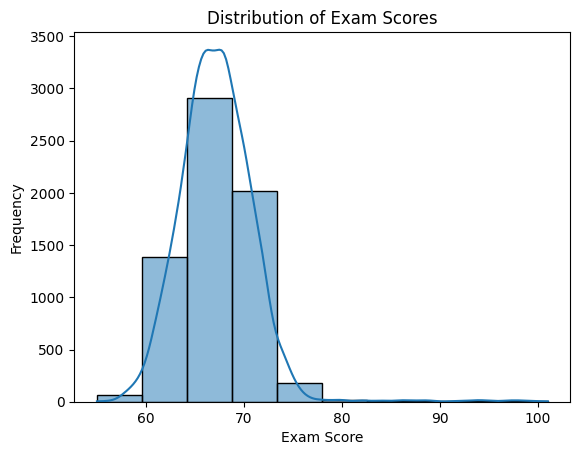

In [36]:
sns.histplot(studentsDF['Exam_Score'], bins=10, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

- made this graph to once again check the distribution in exam scores, didn't actually use in the project was more for myself to see what I was working with

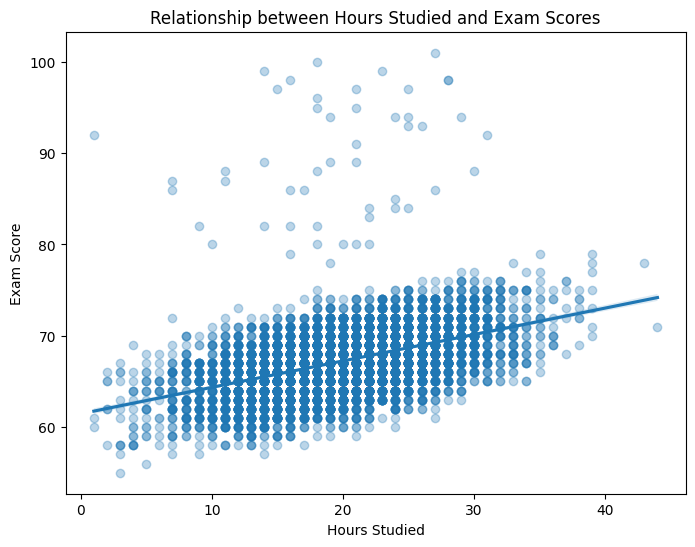

In [37]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=studentsDF, scatter_kws={'alpha':0.3})
plt.title('Relationship between Hours Studied and Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

- tried to find a better way to visualize the relationship between hours studied and exam scores 

### Searching for new relationship, between motivation levels and exam scores

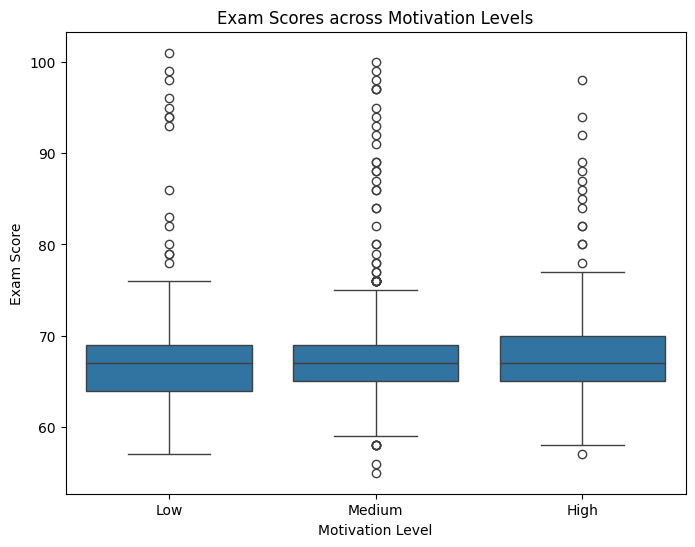

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=studentsDF)
plt.title('Exam Scores across Motivation Levels')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()

- boxplot would not be the right choice to use here, just doesn't look well and has tons of outlies 

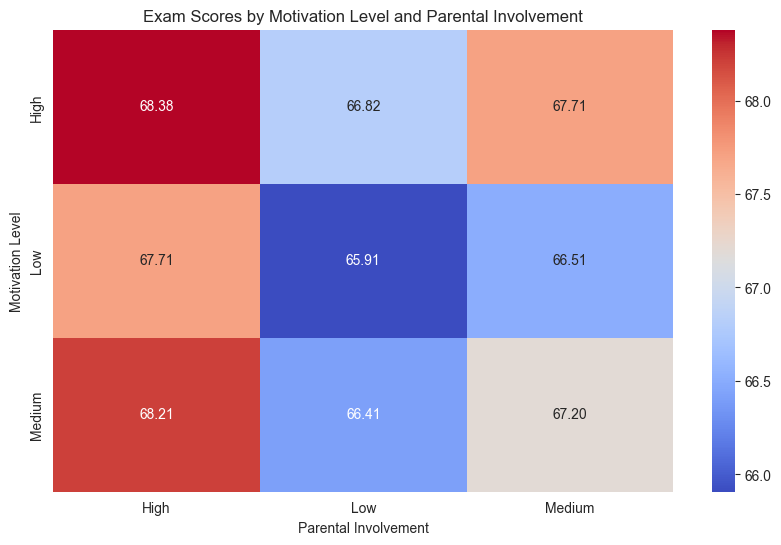

In [42]:
# Create a pivot table for the heatmap
pivot_table = studentsDF.pivot_table(values='Exam_Score', 
                                     index='Motivation_Level', 
                                     columns='Parental_Involvement', 
                                     aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Exam Scores by Motivation Level and Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Motivation Level')
plt.show()

- wanted to look for a relationship between parental involvement and motivation level, I don't believe this heatmap would be great to use because it very visually unclear for an audience

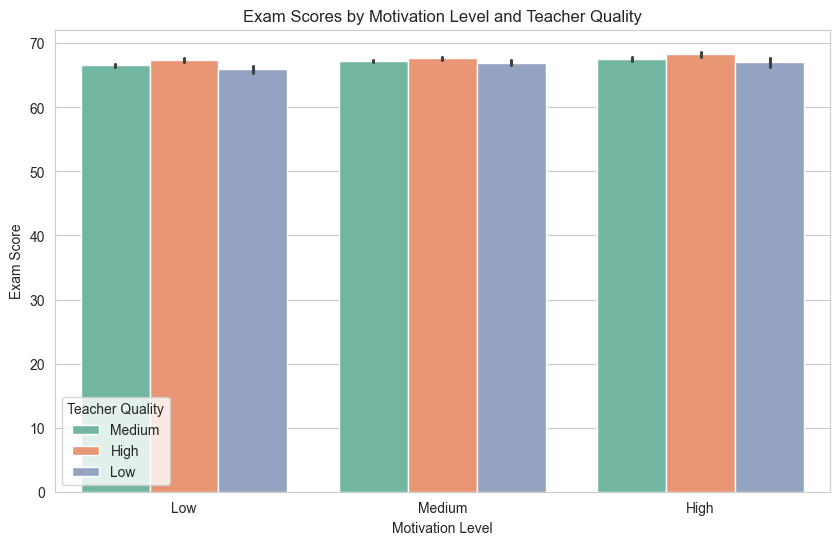

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Motivation_Level', y='Exam_Score', hue='Teacher_Quality', data=studentsDF, palette='Set2')
plt.title('Exam Scores by Motivation Level and Teacher Quality')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.legend(title='Teacher Quality')
plt.show()

- since the exam score are so close it is hard to really tell what difference there are between the groups so this won't be used either

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/1492011132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='Motivation_Level', y='Exam_Score', data=studentsDF, palette='coolwarm', capsize=0.1)


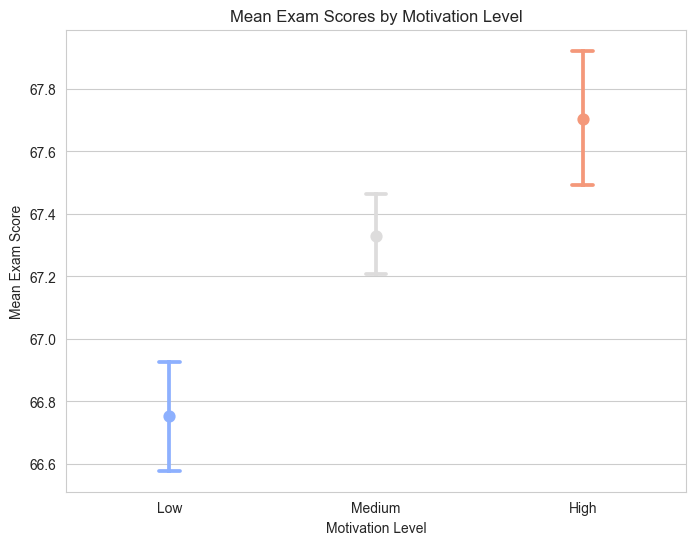

In [50]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Motivation_Level', y='Exam_Score', data=studentsDF, palette='coolwarm', capsize=0.1)
plt.title('Mean Exam Scores by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Mean Exam Score')
plt.show()

- this is the best visual so far as it shows clear positive relationship between motivation level and exam scores!

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/2758086617.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/2758086617.py:6: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


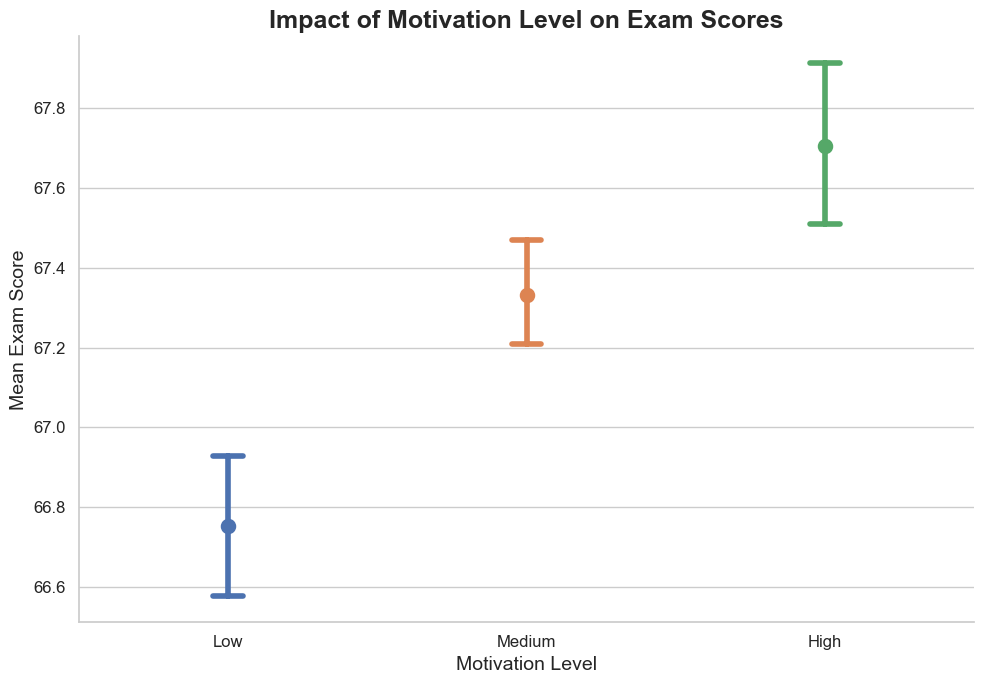

In [54]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure and the plot
plt.figure(figsize=(10, 7))  # Increase figure size for presentation
sns.pointplot(
    x='Motivation_Level', 
    y='Exam_Score', 
    data=studentsDF, 
    palette='deep',  
    capsize=0.1, 
    markers='o', 
    linestyles='-', 
    scale=1.5  # Increase marker size
)

# Customize the title and labels
plt.title('Impact of Motivation Level on Exam Scores', fontsize=18, weight='bold')
plt.xlabel('Motivation Level', fontsize=14)
plt.ylabel('Mean Exam Score', fontsize=14)

# Adjust tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

- same as the previous visualization except I changed some of the formatting to make it more presentable

/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/381855547.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Hours_Studied', data=studentsDF, palette='deep', ax=axes[0])
/var/folders/h2/bl2bgq3x4zb1fsnmk_06k8d80000gn/T/ipykernel_70856/381855547.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score_Group', y='Attendance', data=studentsDF, palette='deep', ax=axes[1])


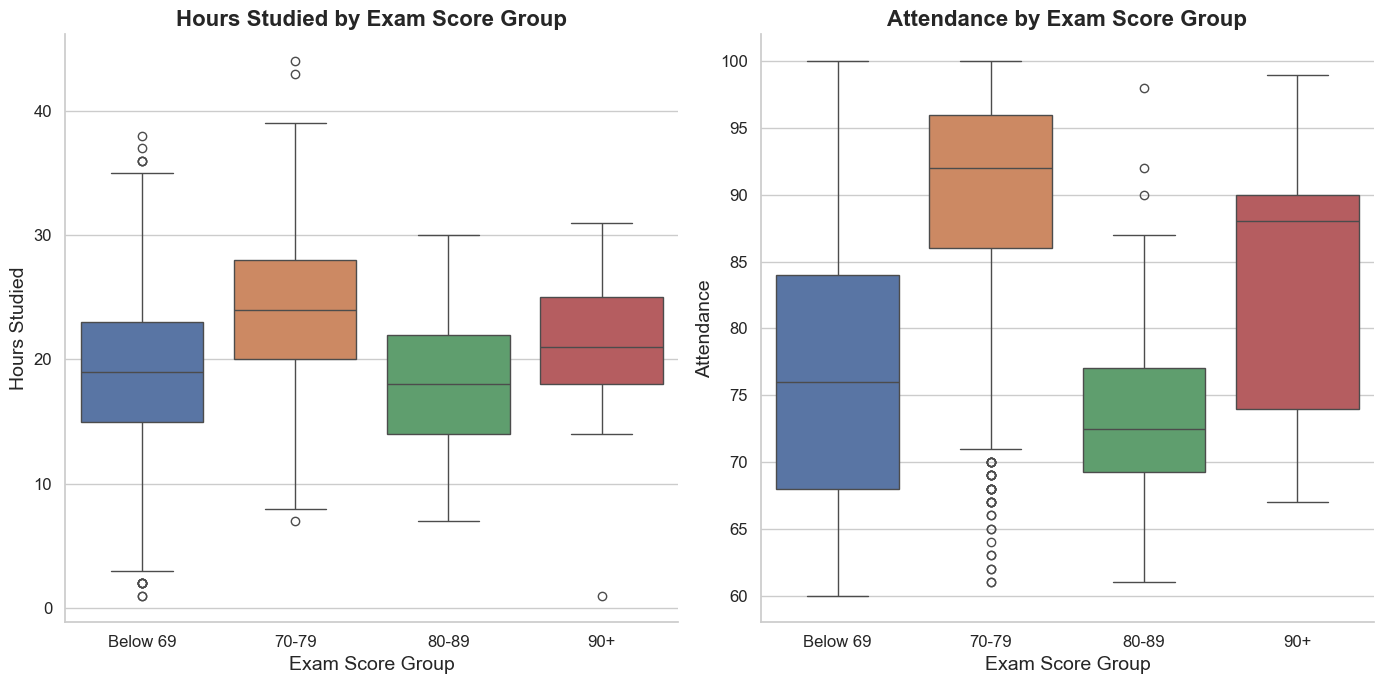

In [55]:

# Combine the dataframes for easier plotting with labels
studentsDF['Score_Group'] = pd.cut(studentsDF['Exam_Score'],
                                   bins=[-1, 69, 79, 89, 100],
                                   labels=['Below 69', '70-79', '80-89', '90+'])

# Set the style to match previous visualizations
sns.set(style="whitegrid")

# Create subplots for Hours Studied and Attendance
fig, axes = plt.subplots(1, 2, figsize=(14, 7))  # Slightly larger figure size

# Box plot for Hours Studied
sns.boxplot(x='Score_Group', y='Hours_Studied', data=studentsDF, palette='deep', ax=axes[0])
axes[0].set_title('Hours Studied by Exam Score Group', fontsize=16, weight='bold')
axes[0].set_xlabel('Exam Score Group', fontsize=14)
axes[0].set_ylabel('Hours Studied', fontsize=14)

# Box plot for Attendance
sns.boxplot(x='Score_Group', y='Attendance', data=studentsDF, palette='deep', ax=axes[1])
axes[1].set_title('Attendance by Exam Score Group', fontsize=16, weight='bold')
axes[1].set_xlabel('Exam Score Group', fontsize=14)
axes[1].set_ylabel('Attendance', fontsize=14)

# Adjust tick label size
for ax in axes:
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Remove top and right spines for both plots for a cleaner look
sns.despine()

# Adjust the layout to ensure everything fits nicely
plt.tight_layout()

# Display the plots
plt.show()


- went back and got this visual from earlier to make the theme fit with the previous visual as well as making it more presentable 

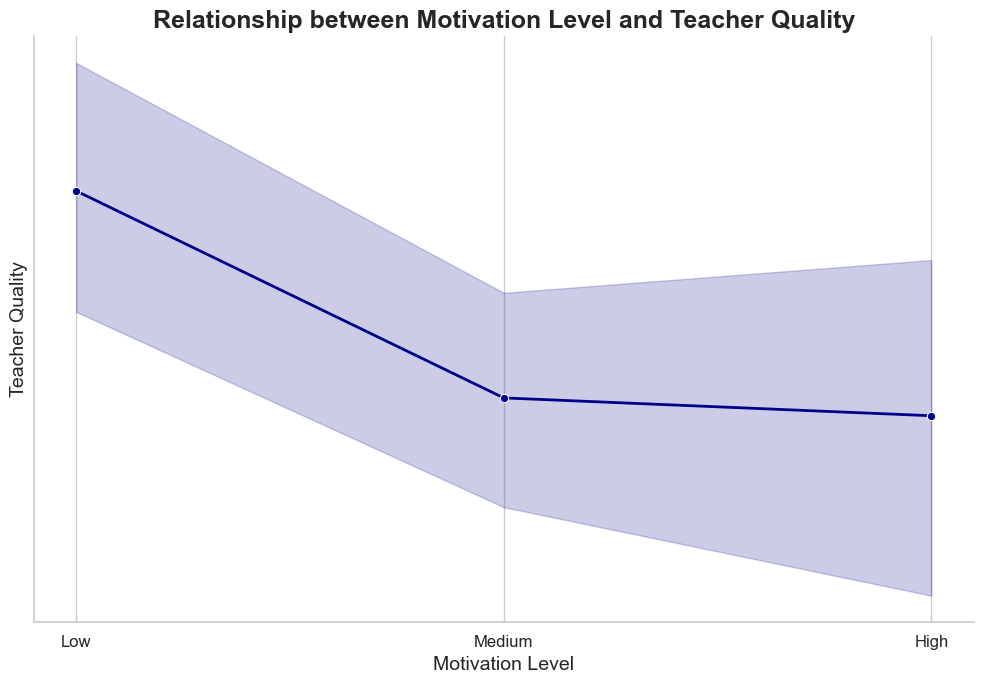

In [80]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure and the plot
plt.figure(figsize=(10, 7))  # Increase figure size for presentation

# Line plot for Motivation Level vs. Teacher Quality
sns.lineplot(
    x='Motivation_Level', 
    y='Teacher_Quality', 
    data=studentsDF, 
    marker='o',  # Add markers to the line
    color='darkblue',  # Line color
    linewidth=2  # Line width
)

# Customize the title and labels
plt.title('Relationship between Motivation Level and Teacher Quality', fontsize=18, weight='bold')
plt.xlabel('Motivation Level', fontsize=14)
plt.ylabel('Teacher Quality', fontsize=14)

# Adjust tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()  # Ensure everything fits nicely
plt.show()

- initally thought that teacher quality might have a positive relationship with motivation level but was proven wrong, this could be used in the project to show a counter.

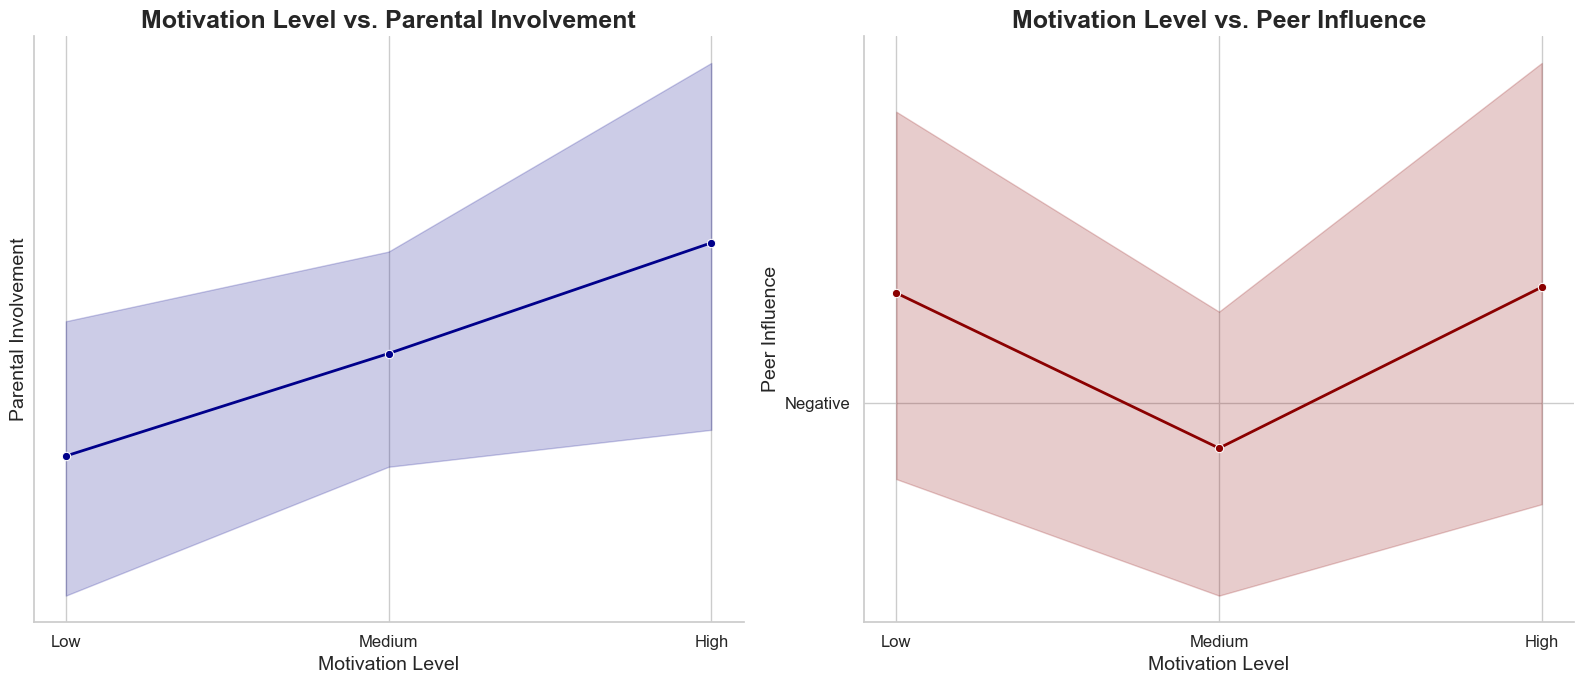

In [65]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))  # Adjust size for better spacing

# Line plot for Motivation Level vs. Parental Involvement
sns.lineplot(
    x='Motivation_Level', 
    y='Parental_Involvement', 
    data=studentsDF, 
    marker='o', 
    color='darkblue', 
    linewidth=2, 
    ax=axes[0]
)
axes[0].set_title('Motivation Level vs. Parental Involvement', fontsize=18, weight='bold')
axes[0].set_xlabel('Motivation Level', fontsize=14)
axes[0].set_ylabel('Parental Involvement', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=12)

# Line plot for Motivation Level vs. Peer Influence
sns.lineplot(
    x='Motivation_Level', 
    y='Peer_Influence', 
    data=studentsDF, 
    marker='o', 
    color='darkred', 
    linewidth=2, 
    ax=axes[1]
)
axes[1].set_title('Motivation Level vs. Peer Influence', fontsize=18, weight='bold')
axes[1].set_xlabel('Motivation Level', fontsize=14)
axes[1].set_ylabel('Peer Influence', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=12)

# Remove top and right spines for both plots for a cleaner look
sns.despine(ax=axes[0])
sns.despine(ax=axes[1])

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()

- since there wasn't a relationship between motivation level and teacher quality, I looked for other relationships and found them in parental involvement and peer influence. These will definitely be used in the project because it shows clear positive relationships

### note that many more visuals where made but for the sake of keeping this turn in organized I removed alot that didn't end up being used for the project